# A/B TESTING - COOKIE CATS GAMES & BUSINESS PROBLEM

Cookie Cats, a highly popular mobile puzzle game created by Tactile Entertainment, follows the classic "connect three" puzzle format where players connect tiles of the same color to clear levels.

As players advance through the game, they encounter gates that either require them to wait a substantial amount of time or make an in-app purchase to proceed. These gates not only drive in-app purchases but also serve the purpose of giving players a mandated pause, potentially enhancing their overall enjoyment and engagement with the game.

The original placement of the first gate was at level 30. However, in this analysis, we'll delve into an A/B test where we shifted the first gate from level 30 to level 40. Specifically, we aim to assess the impact of this change on player retention.


# DATA DICTIONARY

First thinhs first, let us understand the data set provided

In [1]:
# importing Pandas
import pandas as pd

# reading the data set
df = pd.read_csv('cookie_cats.csv')

# displaying the first few rows
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [2]:
# characteristics of data
df.shape

(90189, 5)

In [3]:
# no. of unique users in the dataset
df['userid'].nunique()

90189

## 1. Context
This dataset includes A/B test results of Cookie Cats to examine what happens when the first gate in the game was moved from level 30 to level 40. When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

## 2. Content
The data we have consists of 90189 unique users who have installed the game since the A/B test started. The following variables are defined as follows

userid: A unique number that identifies each user.

version: Identifies whether the user was put in the control group (gate_30 - a gate at level 30) or the varient group (gate_40 - a gate at level 40).

sum_gamerounds: Signifies the number of game rounds played by the user during the first 14 days after install.

retention_1: Identifies whether the user came back and played the game 1 day after installing

retention_7: Identifies whether the user came back and played the game 7 days after installing

### NOTE: 
Inorder to maintain randomization which plays a vital role in A/B testing process, a user is randomly assigned to one of the groups (control or varient) when  they download the game

# ABOUT THE DATA SET

## 1. Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


df.isnull().sum()

## 2. Descriptive Statistics

Let us now look at the dataset closely at a version level.

In [9]:
df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


In [ ]:
df.groupby("version").agg({"sum_gamerounds" : ["mean","max","count"]})

<AxesSubplot: xlabel='version', ylabel='count'>

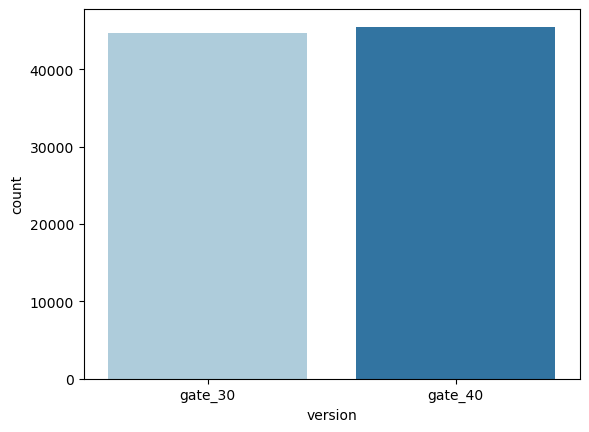

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df.groupby("version")[["sum_gamerounds"]].count()
sns.countplot(x="version",palette="Paired",data=df)

We see that both the control and varient are equally split

<AxesSubplot: xlabel='version'>

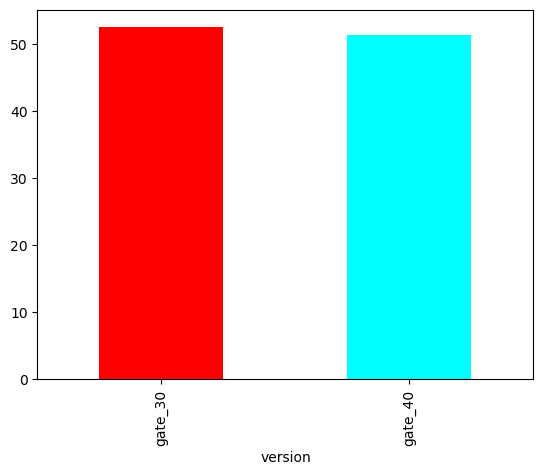

In [17]:
df.groupby("version")["sum_gamerounds"].mean().plot(kind="bar", color=[ "red", "cyan"])

If we interpret the results, the average number of game rounds played by users of both groups seem to be more or less equal but to be precise the mean for 'gate30' is slightly highers. But what if it happened by chance?

# AB TEST

### What is A/B Testing?

A/B testing, also referred to as split testing, is a technique for evaluating and comparing the effectiveness of one or more newer versions with the exsisting version of a webpage or an application. This method is widely employed in fields like marketing, product development, and user experience enhancement to guide decision-making based on empirical data and enhance overall performance.

### Why is A/B Testing done?

The primary purpose of A/B testing is to identify which variation (A or B) of a web page or an application produces better results in terms of a specific key performance indicator (KPI). This could be anything from click-through rates, conversion rates, user engagement, or any other measurable metric that aligns with the organization's goals. By comparing two versions under controlled conditions, businesses can gather objective data and make informed decisions to improve their digital assets and achieve better outcomes.### A/B Test Phases

### A/B Test Phases

To apply the A/B Testing for the dataset we should have follow the fundamental steps according to literature of the A/B Testing. These steps can be seen below:

Hypothesis

Assumptions Control

Apply of the Hyphothesis

### Hypothesis

In this case, 

H0: There is no statistically significant difference between 'gate30' and 'gate40'

H1: There is statistically significant difference between 'gate30' and 'gate40'

### Assumptions Control

##### 1. Normal Distribution

The normality assumption is based on the assumption that the data have a normal distribution. The normal distribution is a type of distribution in which the data are distributed in the form of a bell curve, symmetrical with its mean and variability with its standard deviation.

The assumption of normality in A/B tests is especially important so that parametric tests (for example, independent two-sample t-test) can produce accurate results. Parametric tests work on the assumption that the data fit a normal distribution, and the validity of this assumption increases the reliability of the results.

Various methods can be used to evaluate whether the normality assumption is valid. The Shapiro-Wilk Test is also a statistical method that tests the conformity of the data to the normal distribution. The H0 hypothesis states that the data have a normal distribution.

If the data do not satisfy the assumption of normality, alternative methods such as non-parametric tests (for example, Mann-Whitney U test) or transformation of the data can be used. Non-parametric tests are statistical methods that can work with data that do not satisfy the assumption of normality.

H0 : The assumption of normal distribution is provided.

H1 : The assumption of normal distribution is not provided.


p-value < 0.05 => H0 -> Reject

p-value > 0.05 => H0 -> Cannot Reject


In [23]:
# importing the necessary libraries
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest


# gate30 
test_stat, pvalue = shapiro(df.loc[df["version"] == "gate_30", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.0881, p-value = 0.0000


In [24]:
# gate40

test_stat, pvalue = shapiro(df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.4826, p-value = 0.0000


In both the cases, the p value is 0. Hence the normality assumption was rejected because it was less than 0.05.

##### 2. Variance Homogeneity Assumption
In statistical methods such as A/B testing, the assumption of homogeneity of variance is based on the assumption that data distributions between two or more groups have the same or similar variance. This assumption refers to the situation where the data of the groups show homogeneous and similar variability.

Homogeneity of variance is especially important in parametric tests such as ANOVA (Analysis of Variance) and independent two-sample t-test. These tests produce more reliable results when the data conform to the assumption of homogeneity of variance. If the assumption of homogeneity of variance is not valid, alternative test methods or transformations can be used.

Various methods can be used to control and evaluate variance homogeneity. Levene's test is a statistical test that evaluates whether the variances of the groups are homogeneous. The H0 hypothesis states that the variances of the groups are homogeneous.

H0 : The variance is homogeneous.

H1 : The variance is not homogeneous.


p-value < 0.05 => H0 -> Reject

p-value > 0.05 => H0 -> Cannot Reject

In [25]:
test_stat, pvalue = levene(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                            df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.5292, p-value = 0.4669


H0 cannot be rejected because the p-value is greater than 0.05. 

### Apply of the Hyphothesis

If the normality assumption is rejected for the A/B test, but the variance homogeneity assumption is satisfied, then it is recommended to use non-parametric test methods.

Non-parametric tests are statistical tests used when data do not satisfy the normality assumption or do not comply with other assumptions.

The Mann-Whitney U Test is a test used to compare two independent groups. If the homogeneity of variance assumption is not met, Welch's t-test can be used instead.

p-value < 0.05 => H0 -> Reject

p-value > 0.05 => H0 -> Cannot Reject

In [26]:
test_stat, pvalue = mannwhitneyu(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                            df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 1024331250.5000, p-value = 0.0502


H0 cannot be rejected because the p-value is greater than 0.05.

That is, there is no statistically significant difference between 'gate30' and 'gate40' with 95% confidence. Therefore, the result came about by chance.

# CONCLUSION

In this notebook work, we tried to understand the business problem for Cookie Cats Games. The company was undecided about where to place the door in the game. We decided to analyze how the location of this door affects the continuation of their earnings. First of all, we got to know the dataset. Afterwards, we made a short analysis between the variables. At the end of this analysis, gate30 seemed to be more advantageous. But we needed to prove it statistically. We formed our H0 hypothesis and said 'there is no statistically significant difference between these two doors'. We then used the shapiro test for the assumption of normality and the levene test for homogeneity of variance. We used the non-parametric Mann-Whitney U Test as the normality assumption was rejected. As a result, we can say that there is no statistically significant difference between these two doors with 95% confidence. Therefore, the company can continue to use gate30